In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import warnings

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings('ignore')

# Random Forest Classifiers

Welkom bij de workshop over Random Forest Classifiers. In dit notebook hopen we iets meer te vertellen over wat een Random Forest Classifier is, hoe het werkt en hoe het kan toegepast worden. Daarbij delen we de notebook op in 3 onderdelen:
- Theorie
- Parametrisering (bevat opdrachten)
- Missing values (bevat opdrachten)

In de workshop van Huib is al het een en ander aan theorie behandeld. We zullen daarom niet al te diep hier op ingaan maar de meeste belangrijk punten herhalen om het geheugen op te frissen. Random Forest Classifier wordt overigens door het notebook heen aangeduid met de afkorting RFC.

## Inladen dataset

In [19]:
heart_df = pd.read_csv('heart.csv')
heart_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [20]:
# Train data wordt gemaakt voor verder gebruik
X = heart_df.drop('target', axis=1)
y = heart_df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, shuffle=True)

## Theorie

RFC is een machine learning algoritme wat gebruikt wordt om classificatie problemen op te lossen. Dit algoritme valt dus onder supervised machine learning.

Een RFC is een verbetering/uitbreiding op het Decision Tree Classifier (DTC) algoritme. Een DTC wordt gemaakt door een boomstructuur met beslissingen te creeren. Hierbij wordt de structuur zo opgezet, dat elke scheiding per vertakking de grootste scheiding van informatie oplevert. Om tijdens het creeren van de boom steeds de beste scheiding van takken te kiezen wordt de data entropie gebruikt.

Een RFC maakt gebruik van meerdere DTC's. Door verschillende DTC's op te zetten met random gegenereerde datasets uit een dataset kunnen betere resultaten behaald worden dan met 1 DTC. Dit genereren van random datasets heet 'bagging' en is ook naar voren gekomen in de vorige RFC workshop.

Een RFC gaat uiteindelijk de uitkomsten van alle DTC's tellen en bepaalt met een 'majority vote' het meest gekozen resultaat. Deze manier van werken wordt het 'divide and conquer' of 'ensemble' principe genoemd. Hieronder is een spelletje het effect van dit principe te zien.

##### Spelregels:
Genereer een random getal tussen de 0 en 1.
Als het getal kleiner dan/gelijk aan 0.4 is dan verlies je het geld
Als het getal groter dan 0.4 dan win je het geld

##### Situaties:
- 1 keer met 100 euro
- 10 keer met 10 euro
- 100 keer met 1 euro

Met welk spelletje zou je de meeste winkans hebben houdend aan bovenstaande spelregels?

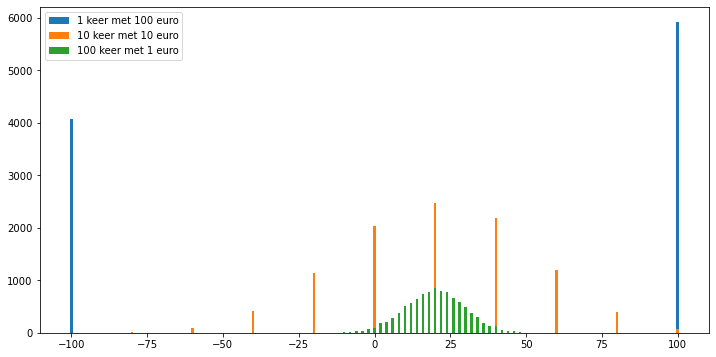

In [21]:
# todo?
def win_money(play, money, repeat) -> [int]:
    total_results = []
    for r in range(repeat):
        game_result = 0
        for p in range(play):
            if random.random() <= 0.4:
                game_result -= money
            else:
                game_result += money
        total_results.append(game_result)
    return total_results

a = pd.Series(win_money(1, 100, 10000)).value_counts()
b = pd.Series(win_money(10, 10, 10000)).value_counts()
c = pd.Series(win_money(100, 1, 10000)).value_counts()

plt.figure(figsize=(12,6))
plt.bar(a.index, a, label='1 keer met 100 euro')
plt.bar(b.index, b, label='10 keer met 10 euro')
plt.bar(c.index, c, label='100 keer met 1 euro')
plt.legend()
plt.show()

Zoals in de bovenstaande grafiek te zien is, is de kans om met meer geld naar huis te gaan veel groter bij het laatste spelletje, 100 keer 1 euro.

### Toepassingen in het bedrijfsleven

RFC wordt in verschillende toepassingen gebruikt in het bedrijfsleven. Hieronder een aantal voorbeelden van hoe een RFC gebruikt kan worden.

1. Om bij banken loyale en frauderende klanten te vinden
2. Om invloed van medicijnen op patienten te voorspellen
3. Analyse en voorspelling van beursgedrag
4. Product- en dienstaanbevelingen

## Vergelijking RFC en DTC

Om te zien of een RFC ook voor de gebruikte dataset een beter model biedt dan een DTC kunnen we de scores vergelijken. Het vergelijken van scores kan heel simpel zonder parameters te gebruiken of door eerst te zoeken naar de beste hyperparameters voor beide modellen.

#### Opdracht:

Maak een RFC en DTC model en tr

In [22]:
# todo

## Parametrisering

Om beter inzichtelijk te maken hoe een RFC werkt gaan we kijken naar een aantal parameters. We kijken hierbij vooral naar parameters die gemiddeld het meest vaak invloed hebben op het model. Waarbij sommige parameters alleen op specifieke datasets invloed hebben. Hier in een tabel de parameters van een RFC met uitleg.

| Parameter | Uitleg
| :--- | :---
| n_estimators | aantal bomen in RFC
| max_features | max aantal features overwogen voor node split
| max_depth | max takken diepte in elke DTC
| min_samples_split | min aantal datapunten dat geplaatst moet worden voordat de node wordt gesplit
| min_samples_leaf | min aantal datapunten om een nieuwe node te kunnen creeren
| bootstrap | sta het dubbel gebruiken van features toe

### Opdracht Grid Search:

Een van de manieren om snel de beste parameters voor jouw model te vinden is door gebruik te maken van een grid search. Dit kan op de volgende manieren gedaan worden:
- instantiëer een RFC model
- maak een dict met parameters om te testen
- instantiëer een GridSearchCV model en fit deze op de traindata
- vraag beste parameters op voor combinatie met hoogste score

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [23]:
# todo

Als het goed is krijg je vooral standaard model waardes terug als beste parameter. Dit heeft onder andere te maken met de grootte van de dataset.

### Opdracht Criterion:

Vergelijk de score van het model voor parameter criterion 'gini' en 'entropy'. Als je random_state niet op 0 zet, neem dan het gemiddelde van verschillende tests. Wat is het verschil in accuracy?

In [24]:
# todo

In de workshop van Huib hebben we al gezien wat het verschil is tussen de gini index en entropie. De gini index en entropie zijn beide wiskundige functies om de beste split in informatie te bepalen. 

Beide functies hebben over het algemeen geen significant verschil in resultaat. Het grootste verschil tussen gini en entropie is de runtime. Entropie bevat in tegenstelling tot gini een logaritmische functie waardoor runtimes hoger liggen. Daarom heeft sklearn gini als standaard staan.

### Opdracht

### Bronnen:
https://datascience.stackexchange.com/questions/10228/when-should-i-use-gini-impurity-as-opposed-to-information-gain
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html?highlight=randomforest#sklearn.ensemble.RandomForestClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74